# SARIMA - Seasonal AutoRegressive Integrated Moving Average
## With SARIMA we use an additional set of parameters that describe seasonal components of our model (P, D, Q)m.
- P : Seasonal Regression
- D : Differencing
- Q : Moving Average
- m : Rows in Each Season Cycle
## With monthy data with a yearly cycle m would be equal to 12.

## Imports

In [1]:
# Linear Algebram, Data Manipulation
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as sm

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
co2_df = pd.read_csv("./datasets/co2_data.csv", index_col="date", parse_dates=True)
co2_df

,co2
date,
1958-03-01,315.70
1958-04-01,317.45
1958-05-01,317.51
1958-06-01,317.24
1958-07-01,315.86
...,...
2020-06-01,416.38
2020-07-01,414.38
2020-08-01,412.55


<AxesSubplot:xlabel='date'>

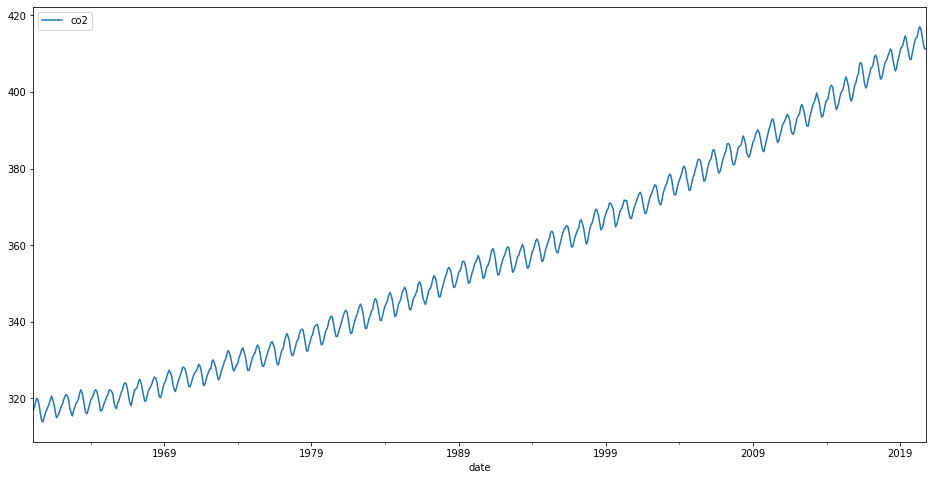

In [4]:
co2_df = co2_df[co2_df.index > "1960-01-01"]
co2_df = co2_df.asfreq("MS")
co2_df.fillna(method="ffill")
co2_df.plot(figsize=(16, 8))

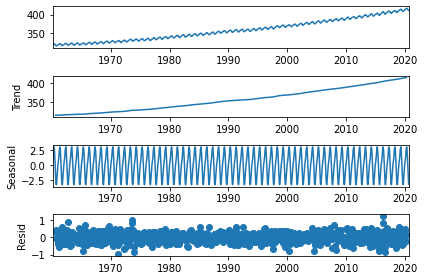

In [21]:
res = seasonal_decompose(co2_df, model="add")

res.plot()
plt.show()

In [22]:
auto_arima(co2_df, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=451.350, Time=4.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2378.581, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1613.443, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2384.532, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1102.222, Time=2.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=757.044, Time=2.08 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=434.078, Time=8.49 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=587.831, Time=6.64 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=10.89 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=490.013, Time=6.44 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=431.317, Time=5.76 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=423.270, Time=2.38 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1495.893, Time=0.55 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -196.659
Date:                            Mon, 25 Oct 2021   AIC                            403.318
Time:                                    17:54:23   BIC                            426.270
Sample:                                         0   HQIC                           412.174
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2110      0.059      3.594      0.000       0.096       0.326
ma.L1         -0.5571      0.046    -11.992      0.000      -0.648      -0.466
ar.S.L12       0.9996      0.000   3251.740      0.000       0.999       1.000
ma.S.L12      -0.8624      0.022    -40.045      0.000      -0.905      -0.820
sigma2         0.0930      0.005     20.659      0.000       0.084       0.102
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.68   Prob(JB):                         0.11
Heteroskedasticity (H):               1.18   Skew:                            -0.02
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
train_df = co2_df.iloc[:583]
test_df = co2_df.iloc[583:]

<AxesSubplot:xlabel='date'>

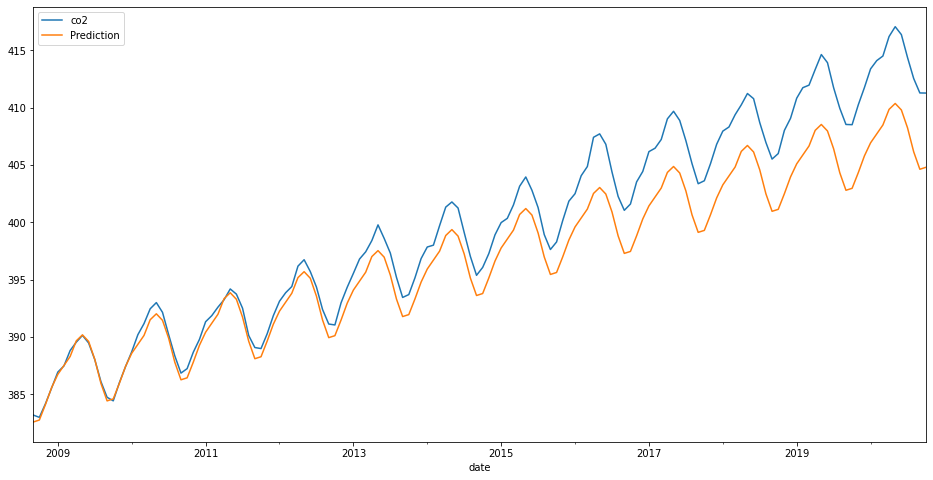

In [26]:
model = SARIMAX(train_df, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
res = model.fit()

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = res.predict(start, end, type="linear").rename("Prediction")

test_df.plot(legend=True, figsize=(16, 8))
prediction.plot(legend=True)

## Test Prediction

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error :", mean_absolute_error(test_df, prediction))
print("Mean Squared Error :", mean_squared_error(test_df, prediction))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(test_df, prediction)))

Mean Absolute Error : 2.708114912228967
Mean Squared Error : 11.5618019060545
Root Mean Squared Error : 3.400264975859161


## Predict the Future

<AxesSubplot:xlabel='date'>

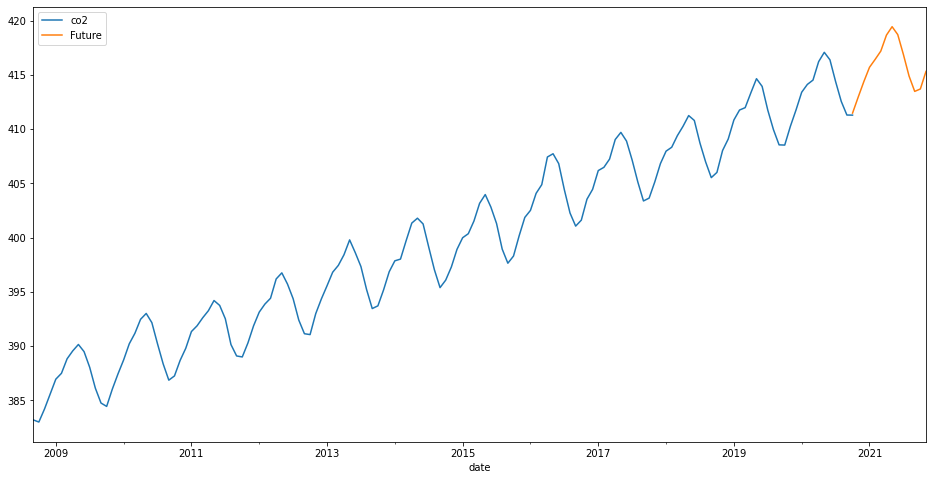

In [32]:
model = SARIMAX(co2_df, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
res = model.fit()

future = res.predict(len(co2_df)-1, len(co2_df)+12, typ="levels").rename("Future")

test_df.plot(figsize=(16, 8), legend=True)
future.plot(legend=True)